<a href="https://colab.research.google.com/github/hermannkakapeu/STAT_for_ML_and_DL/blob/main/Entrainement_1_parametres_stat_description_de_varable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### ANALYSE UNIVARIEE

l'analyse univariée est la forme la plus simple de l'analyse statistique dont l'objectif est de décrire chacune des variables sans tenir compte des rélations existantes entre ces dernières. On traite les variable de facon individuel.

Dans cette partie nous apprenons à calculer les stat usuels utilisées pour décrire les données.
---



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
#donnees se trouvant dans seaborn

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
tips_df['tip'].mean()

2.99827868852459

In [7]:
tips_df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

le premier quartile est une valeur qui indique que 25% des tips sont inférieurs à cette valeur . pareil

In [8]:
# distribution de fréquence de la variable TIP

tips_df['tip'].value_counts()

2.00    33
3.00    23
4.00    12
5.00    10
2.50    10
        ..
4.34     1
1.56     1
5.20     1
2.60     1
1.75     1
Name: tip, Length: 123, dtype: int64

In [9]:
# distribution de frequence en terme de pourcentage

tips_df['tip'].value_counts(normalize=True)

2.00    0.135246
3.00    0.094262
4.00    0.049180
5.00    0.040984
2.50    0.040984
          ...   
4.34    0.004098
1.56    0.004098
5.20    0.004098
2.60    0.004098
1.75    0.004098
Name: tip, Length: 123, dtype: float64

In [10]:
#etendue de la variable 
print(tips_df['tip'].max() - tips_df['tip'].min())

# variance 
print(tips_df['tip'].var())

# ecart type 
print(tips_df['tip'].std())

9.0
1.914454638062471
1.3836381890011822


In [11]:
#methodes pour calculer individuellement les quartiles

tips_df['tip'].quantile(0.25)

2.0

25% des pourboires sont inférieurs à 2 dollars

In [12]:
#une autre methode avec numpy 

np.quantile(tips_df['tip'], 0.5)

2.9

In [13]:
np.quantile(tips_df['tip'], [0.25, 0.5, 0.75])

array([2.    , 2.9   , 3.5625])

In [14]:
# IQR : gamme iterquartiles (hauteur de la moustache) 3em quartile moins 1er quartile

from scipy import stats

stats.iqr(tips_df['tip'])

1.5625

In [15]:
# si on enleve l'option 'all' , cette fonction naffiche que les résultats pour les variables quantitatives.

tips_df.describe(include = 'all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [16]:
#dtatframe des client qui viennent uniquement du weekend 

df_week = tips_df[(tips_df['day']=="Sun") | (tips_df['day']=="Sat")]
df_week

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [17]:
# calculer la consommation moyenne des client qui viennent le weekend

df_week.groupby('day')['total_bill'].agg(['mean', 'median'])

,mean,median
day,,
Thur,NaN,NaN
Fri,NaN,NaN
Sat,20.441379,18.24
Sun,21.410000,19.63


##VISUALISATIONS

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'consommation totale')

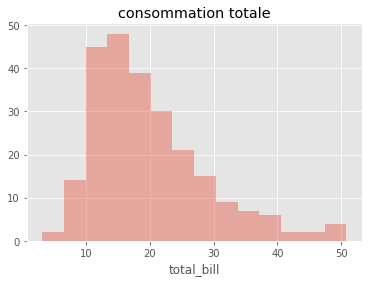

In [18]:
#histogramme de la variable indiquant la consommation tatola

sns.distplot(tips_df['total_bill'], kde=False).set_title('consommation totale')

Text(0.5, 1.0, 'consommation totale')

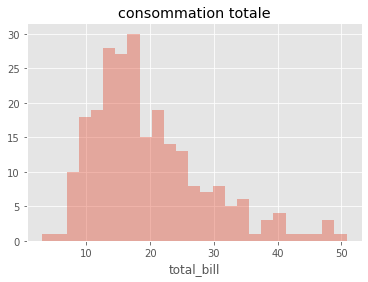

In [19]:
sns.distplot(tips_df['total_bill'], 
             kde=False,
             bins=25).set_title('consommation totale')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'consommation totale')

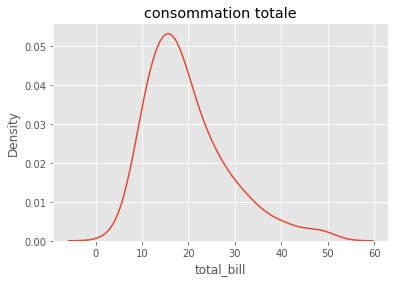

In [20]:
#en mettant False a l'attribut hist on obtient la densité de probabilité de la variable

sns.distplot(tips_df['total_bill'], 
             hist=False,
             bins=25).set_title('consommation totale')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'consommation totale')

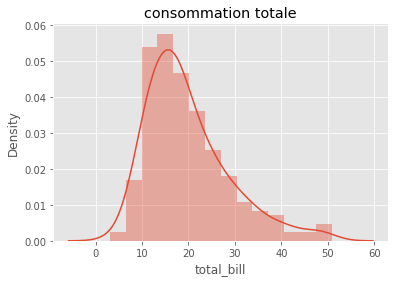

In [21]:
# la fonction 'distplot' affiche par defaut et l'histogramme de la variable et le densité de probabilité

sns.distplot(tips_df['total_bill']).set_title('consommation totale')

pour décrire cette variable, nous pouvons dire que la distribution du montant totale de la consommation dans ce restaurent est unimodale et asymétrique vers la droite centrée à 17,79 dollars avec la plupart des valeurs se trouvant entre 13?35 et 24,13 dollars. cette plage est donnée a partir des quartiles a causes des possibles valeurs abérantes.

#Comment decrire un histogramme?

pour cela il faut porter l'attention sur 04 points essentiels :
1. la forme : son apparence (symetrique, asymetrique positive - etalé vers la droite, asymetrique negative...)
2. Le centre : la médiane 
3. la dispersion des valeurs : interpréter la variabilités des données en utilisant les paramettre tels que la variance, l'écart type, IQR... 
4. les valeur abérant, des valeur qui sortent du lot (outlayers)
une valeur est dite abérante lorsqu'elle est soit inférieur au 1er quartile - 1.5*IQR soit supérieur au 3em quartile + 1.4*IQR


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'loi Normale')

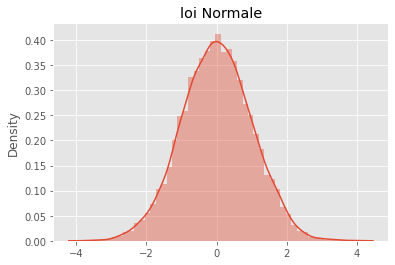

In [22]:
# exemple de distibution normale

sns.distplot(np.random.normal(size=10000)).set_title('loi Normale')

ce qui caractérise une loi normale cest que sa forme est en cloche
sa distribution es symétrisue, la moyenne est egale à la médiane. le plus souvent on decrit les caracteristiques d'une variable par rapport aux caracteristique d'une loi normamle

In [23]:
 #comment identifier les outlayers

from scipy import stats
"""
il existe plusieurs methodes pour determiner les valeurs abérantes mais l'une d'entre 
elles est la suivante :

si valeur < Q1 - 1.5*IQR ou valeur > Q2 + 1.5*IQR alors
  valeur abérante.
"""

def finding_outlayers(data, variable_name):
  """
  data: DataFrame pandas
  variable_name : chaine de caractère 
  cette fonction va retourner une matrice contenant les données du data contenan
  des outlayers dans la variable selectionnée.
  """

  #calcul de IQR
  iqr = stats.iqr(data[variable_name])
  q1 = data[variable_name].quantile(0.25)
  q3 = data[variable_name].quantile(0.5)

  #calcul de Q1 - 1.5*IQR et Q2 + 1.5*IQR
  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr

  #dataframe des valeurs abérantes 
  outlayers_df = data[(data[variable_name] < lower) | (data[variable_name] > upper)]

  return outlayers_df


finding_outlayers(tips_df, 'tip')

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
44,30.40,5.60,Male,No,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
88,24.71,5.85,Male,No,Thur,Lunch,2
141,34.30,6.70,Male,No,Thur,Lunch,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
181,23.33,5.65,Male,Yes,Sun,Dinner,2
183,23.17,6.50,Male,Yes,Sun,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4


##Les boites à moustaches
elle servent a representer  les distributions quantitatives continues. meilleurs pour representer la forme dune distribution. elles aident aussi à mieux connaitre les valeurs abérantes.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'montant des pour boire')

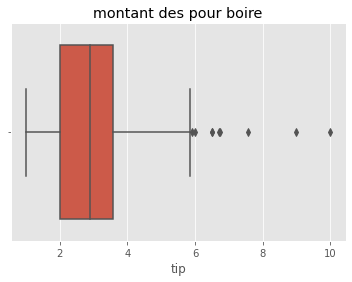

In [24]:
sns.boxplot(tips_df['tip']).set_title('montant des pour boire')

Text(0.5, 1.0, 'montant des pour boire')

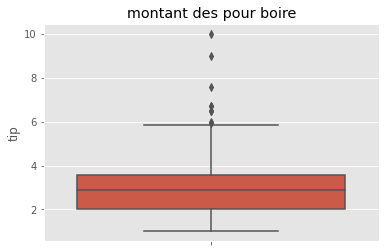

In [25]:
#vertical
sns.boxplot(y=tips_df['tip']).set_title('montant des pour boire')

Text(0.5, 1.0, 'montant des pour boire')

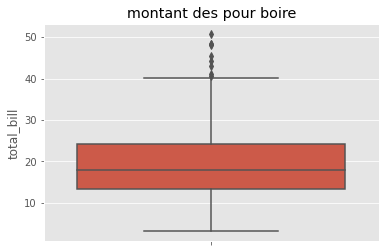

In [26]:
#vertical
sns.boxplot(y=tips_df['total_bill']).set_title('montant des pour boire')

# Representation des données qualitatives
### Diagramme à barres et circulaire

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'frequentation du restaurent')

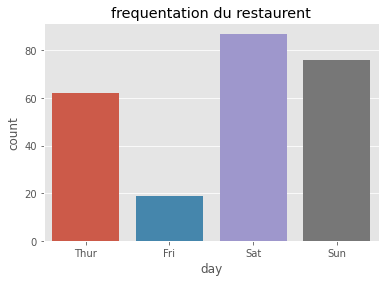

In [27]:

sns.countplot(tips_df['day']).set_title('frequentation du restaurent')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'frequentation du restaurent')

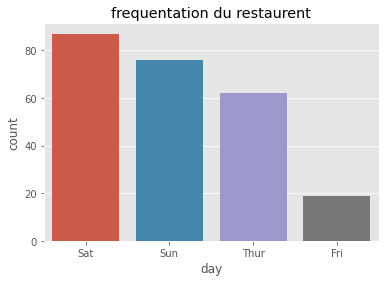

In [32]:
# ranger les barres par ordre decroissant

sns.countplot(tips_df['day'], order = tips_df['day'].value_counts().index)
plt.title('frequentation du restaurent')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'frequentation du restaurent')

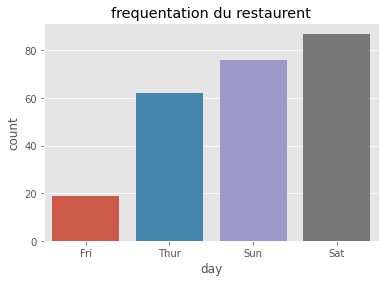

In [35]:
# ranger les barres par ordre decroissant

sns.countplot(tips_df['day'], order = tips_df['day'].value_counts(ascending=True).index)
plt.title('frequentation du restaurent')

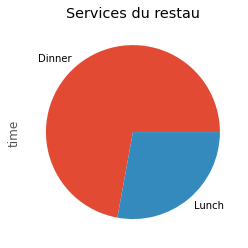

In [37]:
# diagramme circulaire - camanver

tips_df['time'].value_counts().plot(kind='pie', title='Services du restau')